In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import re 
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import time
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from yellowbrick.model_selection import FeatureImportances
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn import model_selection



Duplicate key in file '/Users/monil/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data"
columns = ["Class","id","Sequence"] # Naming the columns
genes = pd.read_csv(url, names = columns) # Reading the data

print(genes.shape)

(106, 3)


In [7]:
genes.nunique() # promoter as "+" and "-" as Non promoter 

Class         2
id          106
Sequence    106
dtype: int64

In [8]:
genes

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
...,...,...,...
101,-,799,\t\tcctcaatggcctctaaacgggtcttgaggggttttttgctga...
102,-,987,\t\tgtattctcaacaagattaaccgacagattcaatctcgtggat...
103,-,1226,\t\tcgcgactacgatgagatgcctgagtgcttccgttactggatt...
104,-,794,\t\tctcgtcctcaatggcctctaaacgggtcttgaggggtttttt...


In [9]:
for index, row in genes.iterrows():
    genes["Sequence"][index] = row["Sequence"].replace("\t", "")
    print(row["Sequence"])
    print(len(row["Sequence"]))

tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgcgggcttgtcgt
57
tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaacgcatcgccaa
57
gtactagagaactagtgcattagcttatttttttgttatcatgctaaccacccggcg
57
aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaatactaacaaactc
57
tcgataattaactattgacgaaaagctgaaaaccactagaatgcgcctccgtggtag
57
aggggcaaggaggatggaaagaggttgccgtataaagaaactagagtccgtttaggt
57
cagggggtggaggatttaagccatctcctgatgacgcatagtcagcccatcatgaat
57
tttctacaaaacacttgatactgtatgagcatacagtataattgcttcaacagaaca
57
cgacttaatatactgcgacaggacgtccgttctgtgtaaatcgcaatgaaatggttt
57
ttttaaatttcctcttgtcaggccggaataactccctataatgcgccaccactgaca
57
gcaaaaataaatgcttgactctgtagcgggaaggcgtattatgcacaccccgcgccg
57
cctgaaattcagggttgactctgaaagaggaaagcgtaatatacgccacctcgcgac
57
gatcaaaaaaatacttgtgcaaaaaattgggatccctataatgcgcctccgttgaga
57
ctgcaatttttctattgcggcctgcggagaactccctataatgcgcctccatcgaca
57
tttatatttttcgcttgtcaggccggaataactccctataatgcgccaccactgaca
57
aagcaaagaaatgcttgactctgtagcgggaaggcgtattatgcacaccgccgcgcc
57
atgcatttttccgcttgtcttcct

In [10]:
seq = pd.DataFrame(np.random.randn(106,57))

print(seq)

           0         1         2         3         4         5         6   \
0    0.587590 -0.419675 -3.481350 -0.197597  0.620098 -0.419294  0.110492   
1    0.264658  0.227019 -1.247370 -0.630528 -0.438833 -1.147199  1.140985   
2    0.810120 -0.172281 -0.309135  0.552746  1.534693 -0.154927 -0.248138   
3   -0.198591 -1.052772 -0.921950 -0.710138  0.019494  0.456265 -1.117471   
4    1.280133 -0.537774  0.333700  0.393148  0.442051  0.011721  0.817519   
..        ...       ...       ...       ...       ...       ...       ...   
101 -2.163777  2.043254 -0.010209  0.444698 -0.122543  2.713087  0.568473   
102 -0.700921  0.433770 -0.962491 -0.495371  0.034716 -0.894488  2.133606   
103  0.167836  0.842284 -0.446014 -0.092613  0.616985  0.662825  1.859002   
104 -1.072722  0.346097 -0.147916 -0.710782  0.369702  1.452053  1.136496   
105 -0.354397  0.957835 -0.647831  0.508750  1.266702 -0.114005 -1.018135   

           7         8         9   ...        47        48        49  \
0  

In [11]:
for index, row in genes.iterrows():
    seq.loc[index] = list(row["Sequence"])

seq["Class"] = genes["Class"]


    

In [12]:
seq

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,c,c,t,c,a,a,t,g,g,c,...,g,a,a,c,t,a,t,a,t,-
102,g,t,a,t,t,c,t,c,a,a,...,t,c,a,a,c,a,t,t,g,-
103,c,g,c,g,a,c,t,a,c,g,...,a,a,g,g,c,t,t,c,c,-
104,c,t,c,g,t,c,c,t,c,a,...,a,g,g,a,g,g,a,a,c,-


<AxesSubplot:xlabel='Class', ylabel='count'>

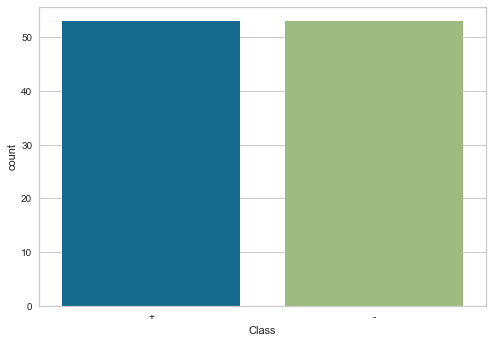

In [13]:
sns.countplot(seq["Class"])

In [14]:
num_seq = pd.get_dummies(seq)

In [15]:
num_seq

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
1,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
102,0,0,1,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1
103,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
104,0,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,1


In [16]:
num_seq.drop("Class_-", axis = 1, inplace = True)
num_seq.rename(columns = {"Class_+" : "Class"}, inplace = True)

num_seq

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class
0,0,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
1,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,1
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,0,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
102,0,0,1,0,0,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
103,0,1,0,0,0,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,0
104,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0


In [17]:
seq

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,c,c,t,c,a,a,t,g,g,c,...,g,a,a,c,t,a,t,a,t,-
102,g,t,a,t,t,c,t,c,a,a,...,t,c,a,a,c,a,t,t,g,-
103,c,g,c,g,a,c,t,a,c,g,...,a,a,g,g,c,t,t,c,c,-
104,c,t,c,g,t,c,c,t,c,a,...,a,g,g,a,g,g,a,a,c,-


In [18]:
nucleotide_sequence = seq

# Initialize the dataframe 'numerical_nucleotide' of shape (106,(57*4))

numerical_nucleotide = pd.DataFrame(np.random.randn(106,(57*4)))

print(numerical_nucleotide.shape)

# Define the dictionary 'key1'
key1 = {'a' : '1000','c' : '0100','g' : '0010','t' : '0001'}

# Assign values to 'numerical_nucleotide'

for i in range(nucleotide_sequence.shape[0]):
      temp1 = '' 
      for j in range(nucleotide_sequence.shape[1]-1):
        temp1 = temp1 + key1[nucleotide_sequence[j][i]]
      temp2 = [int(x) for x in list(temp1)]
      numerical_nucleotide.iloc[i] = temp2

# Assign 'Class' column to 'numerical_nucleotide'

numerical_nucleotide['Class'] = nucleotide_sequence['Class']

# Replace '+' and '-' of 'Class' column with values 1 and 0 respectively

numerical_nucleotide.replace(to_replace = '+',value = 1,inplace = True)
numerical_nucleotide.replace(to_replace = '-',value = 0,inplace = True)

print(numerical_nucleotide)

(106, 228)
       0    1    2    3    4    5    6    7    8    9  ...  219  220  221  \
0    0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1    0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  1.0  0.0   
2    0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  0.0  0.0  1.0   
3    1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
101  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
102  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  1.0  0.0  0.0   
103  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  1.0  0.0  1.0   
104  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  1.0  0.0   
105  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  1.0   

     222  223  224  225  226  227  Class  
0    1.0  0.0  0.0  0

In [19]:
num_seq

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class
0,0,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
1,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,1
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,0,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
102,0,0,1,0,0,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
103,0,1,0,0,0,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,0
104,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0


In [20]:
X = num_seq.drop("Class", axis=1)
y = num_seq["Class"]

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [22]:
validation_type = model_selection.KFold(n_splits = 10)

In [23]:
knn = KNeighborsClassifier(n_neighbors = 3)

cv_result_knn = model_selection.cross_val_score(knn, X_train, y_train, cv = validation_type, scoring="accuracy")

In [24]:
cv_result_knn.mean()

0.7482142857142857

In [25]:
mlp = MLPClassifier(alpha = 1)

cv_result_mpl = model_selection.cross_val_score(mlp, X_train, y_train, cv = validation_type, scoring="accuracy")

cv_result_mpl

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) 

array([1.   , 0.75 , 0.875, 0.875, 0.875, 0.875, 0.875, 1.   , 0.875,
       1.   ])

In [26]:
cv_result_mpl.mean()

0.9

In [27]:
decision_tree = DecisionTreeClassifier(max_depth = 5)

cv_result_decision_tree = model_selection.cross_val_score(decision_tree, X_train, y_train, cv = validation_type, scoring="accuracy")

cv_result_decision_tree


array([0.875, 0.5  , 0.875, 0.75 , 0.75 , 0.875, 0.875, 0.5  , 1.   ,
       1.   ])

In [28]:
cv_result_decision_tree.mean()

0.8

In [29]:
rf = RandomForestClassifier(max_depth=5,n_estimators=10,max_features=1)

cv_result_rf = model_selection.cross_val_score(rf, X_train, y_train, cv = validation_type, scoring="accuracy")

cv_result_rf

array([0.75      , 0.625     , 0.75      , 0.625     , 0.75      ,
       0.625     , 0.75      , 0.5       , 0.875     , 0.85714286])

In [30]:
cv_result_rf.mean()

0.7107142857142856

In [31]:
ada = AdaBoostClassifier()

cv_result_ada = model_selection.cross_val_score(ada, X_train, y_train, cv = validation_type, scoring="accuracy")

cv_result_ada

array([0.875     , 0.875     , 0.875     , 0.75      , 0.875     ,
       0.75      , 0.875     , 0.75      , 1.        , 0.85714286])

In [33]:
cv_result_ada.mean()

0.8482142857142858

In [34]:
gnb = GaussianNB()

cv_result_gnb = model_selection.cross_val_score(gnb, X_train, y_train, cv = validation_type, scoring="accuracy")

cv_result_gnb


array([0.875     , 1.        , 1.        , 1.        , 0.875     ,
       1.        , 1.        , 0.625     , 1.        , 0.71428571])

In [35]:
cv_result_gnb.mean()

0.9089285714285713

In [36]:
svc_linear = SVC(kernel = 'linear')

cv_result_svc_linear = model_selection.cross_val_score(svc_linear, X_train, y_train, cv = validation_type, scoring="accuracy")

cv_result_svc_linear

array([1.   , 0.75 , 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875,
       1.   ])

In [37]:
cv_result_svc_linear.mean()

0.8875

In [38]:
svc_rbf = SVC(kernel = 'rbf')

cv_result_svc_rbf = model_selection.cross_val_score(svc_rbf, X_train, y_train, cv = validation_type, scoring="accuracy")

cv_result_svc_rbf

array([1.        , 0.75      , 1.        , 0.875     , 0.875     ,
       0.875     , 0.875     , 1.        , 0.875     , 0.85714286])

In [39]:
cv_result_svc_rbf.mean()

0.8982142857142857

In [40]:
svc_sigmoid = SVC(kernel = 'sigmoid')

cv_result_svc_sigmoid = model_selection.cross_val_score(svc_sigmoid, X_train, y_train, cv = validation_type, scoring="accuracy")

cv_result_svc_sigmoid

array([1.   , 0.875, 1.   , 0.875, 0.875, 0.75 , 0.875, 0.875, 0.875,
       1.   ])

In [41]:
cv_result_svc_sigmoid.mean()

0.9

In [42]:
a_knn = knn.fit(X_train, y_train)
y_predict = a_knn.predict(X_test) # Predicting using trained model
print(accuracy_score(y_predict,y_test))
print(classification_report(y_predict,y_test))

0.8518518518518519
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.92      0.79      0.85        14

    accuracy                           0.85        27
   macro avg       0.86      0.85      0.85        27
weighted avg       0.86      0.85      0.85        27



In [45]:
a_mlp = mlp.fit(X_train, y_train)
y_predict = a_mlp.predict(X_test) # Predicting using trained model
print(accuracy_score(y_predict,y_test))
print(classification_report(y_predict,y_test))

0.8888888888888888
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.83      0.91      0.87        11

    accuracy                           0.89        27
   macro avg       0.88      0.89      0.89        27
weighted avg       0.89      0.89      0.89        27



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [46]:
a_decision_tree = decision_tree.fit(X_train, y_train)
y_predict = a_decision_tree.predict(X_test) # Predicting using trained model
print(accuracy_score(y_predict,y_test))
print(classification_report(y_predict,y_test))

0.6666666666666666
              precision    recall  f1-score   support

           0       0.53      0.80      0.64        10
           1       0.83      0.59      0.69        17

    accuracy                           0.67        27
   macro avg       0.68      0.69      0.66        27
weighted avg       0.72      0.67      0.67        27



In [47]:
a_rf = rf.fit(X_train, y_train)
y_predict = a_rf.predict(X_test) # Predicting using trained model
print(accuracy_score(y_predict,y_test))
print(classification_report(y_predict,y_test))

0.6296296296296297
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        13
           1       0.67      0.57      0.62        14

    accuracy                           0.63        27
   macro avg       0.63      0.63      0.63        27
weighted avg       0.63      0.63      0.63        27



In [50]:
a_ada = ada.fit(X_train, y_train)
y_predict = a_ada.predict(X_test) # Predicting using trained model
print(accuracy_score(y_predict,y_test))
print(classification_report(y_predict,y_test))

0.8148148148148148
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.83      0.77      0.80        13

    accuracy                           0.81        27
   macro avg       0.82      0.81      0.81        27
weighted avg       0.82      0.81      0.81        27



In [51]:
a_gnb = gnb.fit(X_train, y_train)
y_predict = a_gnb.predict(X_test) # Predicting using trained model
print(accuracy_score(y_predict,y_test))
print(classification_report(y_predict,y_test))

0.8148148148148148
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.75      0.82      0.78        11

    accuracy                           0.81        27
   macro avg       0.81      0.82      0.81        27
weighted avg       0.82      0.81      0.82        27



In [54]:
a_svc_linear = svc_linear.fit(X_train, y_train)
y_predict = a_svc_linear.predict(X_test) # Predicting using trained model
print(accuracy_score(y_predict,y_test))
print(classification_report(y_predict,y_test))

0.8888888888888888
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.83      0.91      0.87        11

    accuracy                           0.89        27
   macro avg       0.88      0.89      0.89        27
weighted avg       0.89      0.89      0.89        27



In [55]:
a_svc_rbf = svc_rbf.fit(X_train, y_train)
y_predict = a_svc_rbf.predict(X_test) # Predicting using trained model
print(accuracy_score(y_predict,y_test))
print(classification_report(y_predict,y_test))

0.8888888888888888
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.83      0.91      0.87        11

    accuracy                           0.89        27
   macro avg       0.88      0.89      0.89        27
weighted avg       0.89      0.89      0.89        27



In [56]:
a_svc_sig = svc_sigmoid.fit(X_train, y_train)
y_predict = a_svc_sig.predict(X_test) # Predicting using trained model
print(accuracy_score(y_predict,y_test))
print(classification_report(y_predict,y_test))

0.8518518518518519
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.92      0.79      0.85        14

    accuracy                           0.85        27
   macro avg       0.86      0.85      0.85        27
weighted avg       0.86      0.85      0.85        27

